<a href="https://colab.research.google.com/github/leokan92/class/blob/main/Aula_3_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação

**Passo 1: Calcular a Distância**

O primeiro passo no KNN é calcular a distância entre os pontos de dados. Geralmente, usamos a distância euclidiana em um espaço de múltiplas dimensões.

In [ ]:
def calcular_distancia_euclidiana(ponto1, ponto2):
    """
    Calcula a distância euclidiana entre dois pontos.
    ponto1 e ponto2 são vetores de características (listas ou arrays).
    """
    soma_dos_quadrados = sum((p1 - p2) ** 2 for p1, p2 in zip(ponto1, ponto2))
    return soma_dos_quadrados ** 0.5

**Passo 2: Encontrar os Vizinhos Mais Próximos**

Após calcular as distâncias, encontramos os k vizinhos mais próximos do ponto de dados que queremos classificar.

In [ ]:
def encontrar_vizinhos(X_train, y_train, ponto_teste, k):
    """
    Encontra os k vizinhos mais próximos de um ponto de teste.
    X_train e y_train são os pontos e rótulos de treinamento.
    ponto_teste é o ponto que estamos classificando.
    k é o número de vizinhos a considerar.
    """
    distancias = []
    for (ponto, rotulo) in zip(X_train, y_train):
        distancia = calcular_distancia_euclidiana(ponto_teste, ponto)
        distancias.append((distancia, rotulo))

    distancias.sort(key=lambda x: x[0])
    vizinhos = distancias[:k]
    return vizinhos

**Passo 3: Fazer a Previsão**

Finalmente, fazemos a previsão baseada nos rótulos dos vizinhos mais próximos. No caso de classificação, podemos usar a votação majoritária.

In [ ]:
from collections import Counter

def prever_rotulo(vizinhos):
    """
    Preve o rótulo de um ponto de teste com base na votação majoritária de seus vizinhos.
    """
    rotulos = [rotulo for _, rotulo in vizinhos] # verificamos os rótulos de cada vizinho
    rotulo_mais_comum = Counter(rotulos).most_common(1)[0][0] # achamos o rótulo mais comum (usamos Counter function para isso)
    return rotulo_mais_comum

**Juntando Tudo: Classe KNN**

Agora, vamos integrar tudo em uma classe KNN.

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predicoes = []
        for ponto_teste in X_test:
            vizinhos = encontrar_vizinhos(self.X_train, self.y_train, ponto_teste, self.k)
            predicao = prever_rotulo(vizinhos)
            predicoes.append(predicao)
        return predicoes

**Como Usar a Classe KNN**


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score# Carregar o conjunto de dados Iris
iris = load_iris()

X, y = iris.data, iris.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNN(k=3)
knn.fit(X_train, y_train)
predicoes = knn.predict(X_test)

# Calcular a precisão comparando predicoes com y_test

In [ ]:
def calcular_precisao(y_verdadeiro, y_pred):
    """
    Calcula a precisão do modelo.
    y_verdadeiro são os rótulos verdadeiros.
    y_pred são os rótulos previstos pelo modelo.
    """
    correto = sum(y1 == y2 for y1, y2 in zip(y_verdadeiro, y_pred))
    total = len(y_verdadeiro)
    return correto / total

In [ ]:
# Calcula a precisão das previsões
precisao = calcular_precisao(y_test, predicoes)
print(f"A precisão do modelo KNN é: {precisao*100:.2f}%")

A precisão do modelo KNN é: 100.00%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np

# Gerar um conjunto de dados com mais de duas dimensões
X, y = make_classification(n_features=4, n_redundant=0, n_informative=4, random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar PCA para reduzir para duas dimensões
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar o modelo KNN com os dados de treino transformados pelo PCA
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_pca, y_train)

# Selecionar um subconjunto de pontos de teste transformados para a visualização
X_test_sub = X_test_pca[:5]

# Encontrar os vizinhos mais próximos para os pontos selecionados
vizinhos = knn.kneighbors(X_test_sub, return_distance=False)

In [ ]:
vizinhos

array([[61, 68,  2, 36,  1, 39, 21],
       [ 6, 30, 32, 11, 44, 68, 45],
       [66, 54, 43, 28,  4, 76, 10],
       [71, 17, 74, 30, 18, 67,  6],
       [14, 65, 57, 62, 77, 59, 27]])

In [ ]:
# Vamos incluir a impressão dos rótulos verdadeiros e previstos para esses 5 pontos
y_test_sub = y_test[:5]  # Os rótulos verdadeiros dos pontos de teste selecionados
predicoes_sub = knn.predict(X_test_sub)  # As previsões para os pontos de teste selecionados

for verdadeiro, previsto in zip(y_test_sub, predicoes_sub):
    print(f"Verdadeiro: {verdadeiro}, Previsto: {previsto}")


Verdadeiro: 1, Previsto: 1
Verdadeiro: 1, Previsto: 1
Verdadeiro: 0, Previsto: 0
Verdadeiro: 0, Previsto: 0
Verdadeiro: 1, Previsto: 1


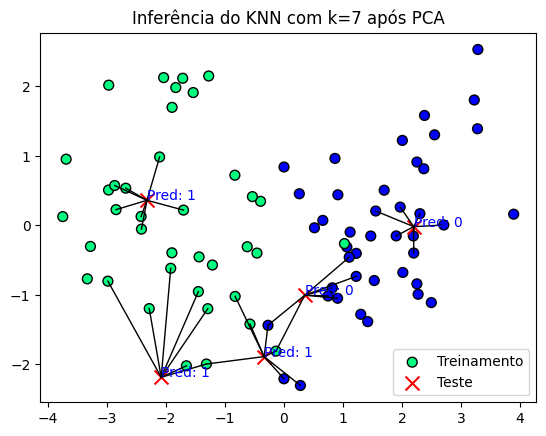

In [ ]:
# Agora, vamos modificar o código de plotagem para incluir o número da previsão
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', marker='o', edgecolor='k', s=50, label='Treinamento')
plt.scatter(X_test_sub[:, 0], X_test_sub[:, 1], c='red', marker='x', s=100, label='Teste')

# Destacar os vizinhos mais próximos
for i, ponto in enumerate(X_test_sub):
    for vizinho in vizinhos[i]:
        plt.plot([ponto[0], X_train_pca[vizinho][0]], [ponto[1], X_train_pca[vizinho][1]], 'k-', lw=1)
    # Adicionar o número da previsão
    plt.text(ponto[0], ponto[1], f'Pred: {predicoes_sub[i]}', color='blue')

plt.title(f'Inferência do KNN com k={k} após PCA')
plt.legend()
plt.show()

## Árvores de Decisão

In [ ]:
# Sample dataset
data = {
    'age': ['youth', 'youth', 'middle_aged', 'senior', 'senior', 'senior',
            'middle_aged', 'youth', 'youth', 'senior', 'youth',
            'middle_aged', 'middle_aged', 'senior'],
    'student': ['high', 'high', 'high', 'medium', 'low', 'low', 'low',
                'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'credit_rating': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no',
                      'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
                      'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

In [ ]:
data

{'age': array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1]),
 'student': array([0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2]),
 'credit_rating': array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]),
 'buys_computer': array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])}

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical
label_encoders = {}
for column in data:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Convert the data dictionary to a format suitable for our decision tree
X = np.column_stack([data[feature] for feature in data if feature != 'buys_computer'])
y = data['buys_computer']

In [ ]:
X

array([[2, 0, 0],
       [2, 0, 0],
       [0, 0, 0],
       [1, 2, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [2, 2, 0],
       [2, 1, 1],
       [1, 2, 1],
       [2, 2, 1],
       [0, 2, 0],
       [0, 0, 1],
       [1, 2, 0]])

In [ ]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
import numpy as np

class Node:
    """
    Esta é a classe Node, que representa um nó na árvore de decisão.
    Cada nó pode ser um nó folha ou um nó de decisão.
    """
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        # feature_index é o índice da característica usada para dividir os dados neste nó
        # threshold é o valor de corte para a divisão
        # left e right são os nós filhos do nó atual
        # value é usado para nós folha e contém a classe mais comum nos dados deste nó
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        # Verifica se um nó é um nó folha (sem filhos)
        return self.value is not None

class DecisionTree:
    """
    Esta é a classe DecisionTree, que implementa o algoritmo de árvore de decisão.
    """
    def fit(self, X, y, min_samples_split=2, min_samples_leaf=2):
        # A função fit treina a árvore de decisão usando os dados fornecidos
        # X e y são os dados de entrada e as rótulos, respectivamente
        # min_samples_split é o número mínimo de amostras necessárias para dividir um nó
        # min_samples_leaf é o número mínimo de amostras em um nó folha
        self.n_classes_ = len(set(y))
        self.min_samples_leaf = min_samples_leaf


        max_depth = 100
        self.root_ = self._grow_tree(X, y, min_samples_split, max_depth)

    def predict(self, X):
        """Make predictions."""
        return np.array([self._predict(inputs) for inputs in X])

    def _grow_tree(self, X, y, min_samples_split, max_depth, depth=0, used_features=None):
        # Esta função recursiva constrói a árvore. Ela escolhe a melhor divisão em cada etapa
        # e cria nós filhos de forma recursiva.

        # Se used_features é None, inicializa como uma lista vazia

        if used_features is None:
            used_features = []

        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Condições de parada: profundidade máxima, poucas amostras, todas as características usadas, etc.
        # Se alguma condição de parada é atingida, cria um nó folha
        if (depth >= max_depth or
                n_labels == 1 or
                n_samples < min_samples_split or
                n_samples < self.min_samples_leaf or
                self._entropy(y) == 0 or
                len(used_features) == n_features):  # Stop if all features have been used
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Seleciona a melhor divisão
        feature_idx, threshold, gain = self._best_split(X, y, n_features, used_features)

        # Se o ganho é zero, cria um nó folha
        # Cria os nós filhos de forma recursiva
        if gain == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        used_features.append(feature_idx)  # Mark the feature as used

        # Grow the children
        left_idxs, right_idxs = self._split(X[:, feature_idx], threshold)
        left_child = self._grow_tree(X[left_idxs, :], y[left_idxs], min_samples_split, max_depth, depth+1, used_features.copy())
        right_child = self._grow_tree(X[right_idxs, :], y[right_idxs], min_samples_split, max_depth, depth+1, used_features.copy())
        return Node(feature_idx, threshold, left_child, right_child)

    def _best_split(self, X, y, n_features, used_features):
      """
      Esta função identifica a melhor divisão possível dos dados no nó atual da árvore.
      Ela itera sobre todas as características disponíveis que ainda não foram utilizadas
      para divisão nesse caminho específico da árvore.
      """
      best_gain = -1
      split_idx, split_thresh = None, None
      for feature_idx in range(n_features):  # Itera sobre cada característica
          if feature_idx in used_features:
              continue  # Pula as características já usadas

          X_column = X[:, feature_idx]  # Extrai a coluna correspondente à característica
          categories = np.unique(X_column)  # Identifica as categorias únicas na coluna

          for category in categories:  # Considera cada categoria como um ponto de divisão
              left_idxs = X_column == category  # Define os índices para a divisão esquerda
              right_idxs = ~left_idxs  # Define os índices para a divisão direita
              gain = self._information_gain(y, left_idxs, right_idxs)  # Calcula o ganho de informação
              if gain > best_gain:  # Se o ganho de informação é o maior até agora, atualiza a melhor divisão
                  best_gain = gain
                  split_idx = feature_idx
                  split_thresh = category

      return split_idx, split_thresh, best_gain  # Retorna o índice da característica, o limiar e o ganho para a melhor divisão


    def _information_gain(self, y, left_idxs, right_idxs):
        """
        Calcula o ganho de informação, uma métrica chave na construção de árvores de decisão.
        O ganho de informação mede a eficácia de uma divisão em termos de redução da impureza.
        """
        parent_entropy = self._entropy(y)  # Calcula a entropia do conjunto pai

        n = len(y)
        n_l, n_r = np.sum(left_idxs), np.sum(right_idxs)  # Calcula o número de amostras em cada divisão
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])  # Calcula a entropia de cada divisão
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r  # Pondera a entropia de cada divisão pelo seu tamanho

        ig = parent_entropy - child_entropy  # O ganho de informação é a diferença entre a entropia do pai e a entropia combinada dos filhos
        return ig

    def _entropy(self, y):
        """
        Calcula a entropia de um conjunto de dados.
        A entropia é uma medida de impureza e é central para a ideia de ganho de informação.
        """
        proportions = np.bincount(y) / len(y)  # Calcula as proporções de cada classe
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])  # Aplica a fórmula da entropia


    def _split(self, X_column, split_thresh):
        """
        Divide os dados com base em uma característica e um valor de limiar.
        Retorna os índices dos dados que caem à esquerda e à direita da divisão.
        """
        left_idxs = X_column == split_thresh  # Índices para dados que correspondem ao limiar
        right_idxs = X_column != split_thresh  # Índices para dados que não correspondem ao limiar
        return left_idxs, right_idxs

    def _predict(self, inputs):
        """
        Faz uma previsão para uma única amostra de entrada.
        Percorre a árvore desde a raiz até um nó folha e retorna o valor desse nó.
        """
        node = self.root_
        while not node.is_leaf_node():  # Continua até chegar a um nó folha
            # Decide qual caminho seguir com base no valor da característica da amostra
            if inputs[node.feature_index] == node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value  # Retorna a classe prevista no nó folha

    def print_tree(self):
        self._print_tree(self.root_)

    def _print_tree(self, node, depth=0):
        if node.is_leaf_node():
            print(f"{'|   ' * depth}> Class: {node.value}")
        else:
            print(f"{'|   ' * depth}> [Feature {node.feature_index} == {node.threshold}]")
            self._print_tree(node.left, depth + 1)
            self._print_tree(node.right, depth + 1)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

In [ ]:
# Inicializa a árvore de decisão
tree = DecisionTree()

# Treina a árvore de decisão com o conjunto de dados
tree.fit(X, y)

# Imprime a árvore
tree.print_tree()

> [Feature 0 == 0]
|   > Class: 1
|   > [Feature 2 == 0]
|   |   > [Feature 1 == 0]
|   |   |   > Class: 0
|   |   |   > Class: 0
|   |   > [Feature 1 == 1]
|   |   |   > Class: 1
|   |   |   > Class: 1


In [ ]:
# Vamos assumir que você tenha as previsões e os verdadeiros valores de y
predictions = tree.predict(X)
decoded_predictions = label_encoders['buys_computer'].inverse_transform(predictions)

# Agora vamos imprimir lado a lado
for true_value, predicted_value in zip(y, decoded_predictions):
    print(f'Verdadeiro: {label_encoders["buys_computer"].inverse_transform([true_value])[0]}, Previsto: {predicted_value}')

# Assumindo que 'y' são as verdadeiras etiquetas codificadas como números
true_labels = label_encoders['buys_computer'].inverse_transform(y)

# Calcular o número de previsões corretas
correct_predictions = np.sum(true_labels == decoded_predictions)

# Calcular a precisão
accuracy = correct_predictions / len(true_labels)

print(f'Precisão: {accuracy*100:.2f}%')


Verdadeiro: 0, Previsto: 0
Verdadeiro: 0, Previsto: 0
Verdadeiro: 1, Previsto: 1
Verdadeiro: 1, Previsto: 0
Verdadeiro: 1, Previsto: 1
Verdadeiro: 0, Previsto: 1
Verdadeiro: 1, Previsto: 1
Verdadeiro: 0, Previsto: 0
Verdadeiro: 1, Previsto: 1
Verdadeiro: 1, Previsto: 1
Verdadeiro: 1, Previsto: 1
Verdadeiro: 1, Previsto: 1
Verdadeiro: 1, Previsto: 1
Verdadeiro: 0, Previsto: 0
Precisão: 85.71%


### Testando em outro dataset

Aqui usamos uma outra implementação para lidar com variáveis contínuas





In [ ]:
import numpy as np

class Node:
    """A node in the decision tree."""

    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        """Check if the node is a leaf node."""
        return self.value is not None

class DecisionTree:
    """Decision Tree Classifier."""

    def fit(self, X, y, min_samples_split=2, max_depth=100):
        """Build the decision tree."""
        self.n_classes_ = len(set(y))
        self.root_ = self._grow_tree(X, y, min_samples_split, max_depth)

    def predict(self, X):
        """Make predictions."""
        return np.array([self._predict(inputs) for inputs in X])

    def _grow_tree(self, X, y, min_samples_split, max_depth, depth=0):
        """Recursive function to grow the tree."""
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping conditions
        if (depth >= max_depth or n_labels == 1 or n_samples < min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Greedily select the best split
        feature_idx, threshold = self._best_split(X, y, n_features)

        # Grow the children
        left_idxs, right_idxs = self._split(X[:, feature_idx], threshold)
        left_child = self._grow_tree(X[left_idxs, :], y[left_idxs], min_samples_split, max_depth, depth+1)
        right_child = self._grow_tree(X[right_idxs, :], y[right_idxs], min_samples_split, max_depth, depth+1)
        return Node(feature_idx, threshold, left_child, right_child)

    def _best_split(self, X, y, n_features):
        """Find the best split for a node."""
        best_gain = -1
        split_idx, split_thresh = None, None
        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_thresh = threshold
                print(f"Feature {feature_idx}, Threshold {threshold}, Gain {gain:.4f}")
        print(f"Best Split -> Feature {split_idx}, Threshold {split_thresh}, Gain {best_gain:.4f}")
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        """Calculate information gain."""
        # Parent loss
        parent_loss = self._entropy(y)

        # Generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # Compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_loss = (n_l / n) * e_l + (n_r / n) * e_r

        # Information gain
        ig = parent_loss - child_loss
        return ig

    def _gini(self, y):
        """Calculate Gini Impurity."""
        proportions = np.bincount(y) / len(y)
        return 1 - sum([p**2 for p in proportions])

    def _entropy(self, y):
        """Calculate the entropy of a set."""
        proportions = np.bincount(y) / len(y)
        # Apply the entropy formula, ignore zero proportions
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

    def _split(self, X_column, split_thresh):
        """Split dataset."""
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _predict(self, inputs):
        """Make a prediction for a single sample."""
        node = self.root_
        while not node.is_leaf_node():
            if inputs[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def print_tree(self):
        """Print the whole tree"""
        self._print_tree(self.root_)

    def _print_tree(self, node, depth=0):
        """Recursive function to print the tree."""
        if not node:
            return

        if node.is_leaf_node():
            print(f"{'|---' * depth}> Predict: {node.value}")
        else:
            print(f"{'|---' * depth}> Feature {node.feature_index} <= {node.threshold}")
            self._print_tree(node.left, depth+1)
            print(f"{'|---' * depth}> Feature {node.feature_index} > {node.threshold}")
            self._print_tree(node.right, depth+1)

    def _most_common_label(self, y):
        """Find the most common label."""
        return np.bincount(y).argmax()

In [ ]:
# Re-run the test using the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Initialize and fit the tree
tree = DecisionTree()
tree.fit(X_train, y_train)

# Make predictions
predictions = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy*100}%')

Feature 0, Threshold 4.3, Gain 0.0133
Feature 0, Threshold 4.4, Gain 0.0545
Feature 0, Threshold 4.5, Gain 0.0687
Feature 0, Threshold 4.6, Gain 0.1279
Feature 0, Threshold 4.7, Gain 0.1434
Feature 0, Threshold 4.8, Gain 0.1752
Feature 0, Threshold 4.9, Gain 0.1580
Feature 0, Threshold 5.0, Gain 0.2382
Feature 0, Threshold 5.1, Gain 0.3636
Feature 0, Threshold 5.2, Gain 0.4214
Feature 0, Threshold 5.3, Gain 0.4480
Feature 0, Threshold 5.4, Gain 0.5589
Feature 0, Threshold 5.5, Gain 0.5418
Feature 0, Threshold 5.6, Gain 0.4860
Feature 0, Threshold 5.7, Gain 0.4786
Feature 0, Threshold 5.8, Gain 0.4500
Feature 0, Threshold 5.9, Gain 0.4227
Feature 0, Threshold 6.0, Gain 0.3774
Feature 0, Threshold 6.1, Gain 0.3593
Feature 0, Threshold 6.2, Gain 0.3223
Feature 0, Threshold 6.3, Gain 0.2268
Feature 0, Threshold 6.4, Gain 0.1871
Feature 0, Threshold 6.5, Gain 0.1623
Feature 0, Threshold 6.6, Gain 0.1688
Feature 0, Threshold 6.7, Gain 0.1490
Feature 0, Threshold 6.8, Gain 0.1342
Feature 0, T

In [ ]:
tree.print_tree() # This will print the tree structure

> Feature 2 <= 1.9
|---> Predict: 0
> Feature 2 > 1.9
|---> Feature 2 <= 4.7
|---|---> Feature 3 <= 1.6
|---|---|---> Predict: 1
|---|---> Feature 3 > 1.6
|---|---|---> Predict: 2
|---> Feature 2 > 4.7
|---|---> Feature 3 <= 1.7
|---|---|---> Feature 2 <= 4.9
|---|---|---|---> Predict: 1
|---|---|---> Feature 2 > 4.9
|---|---|---|---> Feature 3 <= 1.5
|---|---|---|---|---> Predict: 2
|---|---|---|---> Feature 3 > 1.5
|---|---|---|---|---> Feature 0 <= 6.7
|---|---|---|---|---|---> Predict: 1
|---|---|---|---|---> Feature 0 > 6.7
|---|---|---|---|---|---> Predict: 2
|---|---> Feature 3 > 1.7
|---|---|---> Feature 2 <= 4.8
|---|---|---|---> Feature 0 <= 5.9
|---|---|---|---|---> Predict: 1
|---|---|---|---> Feature 0 > 5.9
|---|---|---|---|---> Predict: 2
|---|---|---> Feature 2 > 4.8
|---|---|---|---> Predict: 2


# Comparando os modelos

In [ ]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


# Carregar o conjunto de dados Digits
digits = load_digits()
X, y = digits.data, digits.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Árvore de Decisão com Bagging
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

# Árvore de Decisão com AdaBoost
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Árvore de Decisão com Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Árvore de Decisão com XGBoost
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgboost.fit(X_train, y_train)


In [ ]:
# Adicionando os novos modelos à lista de modelos para treinar e testar
modelos = [dt, bagging, adaboost, random_forest, gradient_boosting, xgboost]
nomes = ['Árvore de Decisão', 'Bagging', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Testar os modelos e calcular a precisão para cada um
for modelo, nome in zip(modelos, nomes):
    predicoes = modelo.predict(X_test)
    precisao = accuracy_score(y_test, predicoes)
    print(f"{nome}: Precisão = {precisao:.4f}")

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Carregar o conjunto de dados Digits
digits = load_digits()
X, y = digits.data, digits.target

# Definir os modelos
modelos = [
    DecisionTreeClassifier(random_state=42),
    BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
]

nomes = ['Árvore de Decisão', 'Bagging', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Aplicar validação cruzada e calcular a precisão média para cada modelo
for modelo, nome in zip(modelos, nomes):
    scores = cross_val_score(modelo, X, y, cv=10)  # cv=10 para 10 folds
    print(f"{nome}: Acurácia Média = {np.mean(scores):.4f}, Desvio Padrão = {np.std(scores):.4f}")

Árvore de Decisão: Acurácia Média = 0.8336, Desvio Padrão = 0.0384
Bagging: Acurácia Média = 0.9271, Desvio Padrão = 0.0315
AdaBoost: Acurácia Média = 0.8325, Desvio Padrão = 0.0387
Random Forest: Acurácia Média = 0.9494, Desvio Padrão = 0.0233
Gradient Boosting: Acurácia Média = 0.9337, Desvio Padrão = 0.0341
XGBoost: Acurácia Média = 0.9376, Desvio Padrão = 0.0261
